In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import spotipy
import spotipy.oauth2 as oauth2

# ROCK IS DEAD!


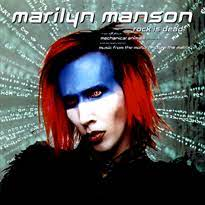

#### Yes, this is a song by [Marilyn Manson](https://open.spotify.com/track/4ukiv6Rp5N4tQZSBT9JRLo?si=64ef9a965e9649fc) included in the movie "[The Matrix (1999)]"(https://www.imdb.com/title/tt0133093/) and maybe he was right back then.   
#### To determine that is a goal of this study but not the only one. We'll explore a basic features as how much energetic and positive is the popular music from the last two decades.  $^{1}$



$^{1}$ *The study may or may not contain not legitimate data based on the shown results. Any conclusions made here could be false and the study should be considered ONLY for training and learning purposes!*

We will use the spotipy module to access [Spotify](spotify.com)'s API. For that I have already registered account as developer on [developer.spotify.com](https://developer.spotify.com/). One doesn't need to be a real developer and to develop an app in order to register. The registration gets us "CLIENT_ID" and "CLIENT_SECRET" with which we could aquire a token. This token connects to the API - one important thing to know is that the token expires every one hour and should be refreshed. In our case the cell of the notebook should be executed again. For convenience a function that does that could be written - this is important especially when big in size data is acquired and the API calls work more than certain threshold - but that's not our case.

In [3]:
# Credentials for the Spotify API
CLIENT_ID = "4a3a2a26f3844b6f9a927fb793ec3e9e"
CLIENT_SECRET = "01266354e24241d9a21b1c772b123f23"

In [4]:
# Get token
token = oauth2.SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
cache_token = token.get_access_token(as_dict=False, check_cache=False)
# Connect
sp = spotipy.Spotify(cache_token)

We're connected. Now we need to select a playlist to interact with.  

The playlist we'll use is called ["Billboard-2000-2020"](https://open.spotify.com/playlist/5qrRRlSesz61OLwmftvVDR). Billboard's ["The Hot 100"](https://www.billboard.com/charts/hot-100) represents the most bought(physical and digital), aired and streamed songs in the United States on a weekly basis. Somehow biased, but that's life :)  

We need to take the playlist's id from spotify and probably most convenient way(when work with smal number of playlists) to do that is just to copy it from the URL.

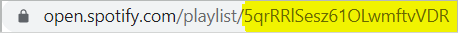


In [5]:
playlist_id = "5qrRRlSesz61OLwmftvVDR"

Now we're ready to get the dataset for this playlist. This is done with the ```python get_playlist_tracks() ``` function which returns a dictionary.

In [6]:
whole_chart = sp.user_playlist_tracks(CLIENT_ID, playlist_id)

In [7]:
whole_chart.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [8]:
whole_chart["total"]

1069

In [9]:
len(whole_chart["items"])

100

But that function returns only the first 100 tracks - no matter overriding the ```limit ``` parameter. But our playlist contains 1069 tracks. That's why we'll loop the function to get the whole list. Meanwhile will take only the the data from the "items" - the actual metadata for the tracks - and return it as a list. Every element in the list is a track.

In [10]:
# this func will take all tracks
def get_playlist_tracks(user_id,playlist_id):
    results = sp.user_playlist_tracks(user_id,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [11]:
whole_chart = get_playlist_tracks(CLIENT_ID,playlist_id)

In [12]:
len(whole_chart)

1069

After we confirmed that we have all tracks let's check what data actually we got :)

In [13]:
whole_chart[0]

{'added_at': '2017-02-14T13:08:53Z',
 'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/shahirahhh'},
  'href': 'https://api.spotify.com/v1/users/shahirahhh',
  'id': 'shahirahhh',
  'type': 'user',
  'uri': 'spotify:user:shahirahhh'},
 'is_local': False,
 'primary_color': None,
 'track': {'album': {'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1uNFoZAHBGtllmzznpCI3s'},
     'href': 'https://api.spotify.com/v1/artists/1uNFoZAHBGtllmzznpCI3s',
     'id': '1uNFoZAHBGtllmzznpCI3s',
     'name': 'Justin Bieber',
     'type': 'artist',
     'uri': 'spotify:artist:1uNFoZAHBGtllmzznpCI3s'}],
   'available_markets': [],
   'external_urls': {'spotify': 'https://open.spotify.com/album/7fZH0aUAjY3ay25obOUf2a'},
   'href': 'https://api.spotify.com/v1/albums/7fZH0aUAjY3ay25obOUf2a',
   'id': '7fZH0aUAjY3ay25obOUf2a',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/ab67616d0000b273b6d9a4fbb0bd49f0f034aea

Lots of mess. We could use the API's [Reference](https://developer.spotify.com/documentation/web-api/reference/#objects-index) to comprehend each feature and eventually remove some of them if not useful.  
In parallel we'll get the so called Audio Features which the API provides. They are:
```
{
    "danceability": 0.735,
    "energy": 0.578,
    "key": 5,
    "loudness": -11.84,
    "mode": 0,
    "speechiness": 0.0461,
    "acousticness": 0.514,
    "instrumentalness": 0.0902,
    "liveness": 0.159,
    "valence": 0.624,
    "tempo": 98.002,
    "type": "audio_features",
    "id": "06AKEBrKUckW0KREUWRnvT",
    "uri": "spotify:track:06AKEBrKUckW0KREUWRnvT",
    "track_href": "https://api.spotify.com/v1/tracks/06AKEBrKUckW0KREUWRnvT",
    "analysis_url": "https://api.spotify.com/v1/audio-analysis/06AKEBrKUckW0KREUWRnvT",
    "duration_ms": 255349,
    "time_signature": 4
}
```
More explanation on them in the metadata file.

In [14]:
# takes about 2 minutes to execute
# these will be the columns of the new df
features_list = ["artist", "song", "album", "album_type", "release_date",
                 "artist_type", "duration_ms", "explicit", "track_id", "track_number",
                 "danceability", "energy", "key", "loudness",
                 "mode", "speechiness", "acousticness", "instrumentalness",
                 "liveness","valence","tempo", "time_signature"]

# create the df
df = pd.DataFrame(columns = features_list, index = range(len(whole_chart)))

i = -1
# Takes about 2 minutes
for track in whole_chart:  
    # start with empty dict
    features = {}
    
    # get the desired fetaures in the dictionary
    features["artist"] = track["track"]["artists"][0]["name"]
    features["song"] = track["track"]["name"]
    features["album"] = track["track"]["album"]["name"]
    features["album_type"] = track["track"]["album"]["album_type"]
    features["release_date"] = track["track"]["album"]["release_date"]
    features["artist_type"] = track["track"]["artists"][0]["type"]
    features["duration_ms"] = track["track"]["duration_ms"]
    features["explicit"] = track["track"]["explicit"]
    features["track_id"] = track["track"]["id"]
    features["track_number"] = track["track"]["track_number"]
    
    # get the audio features
    audio_features = sp.audio_features(features["track_id"])[0]
    
    for feature in features_list[10:]:
        features[feature] = audio_features[feature]
    
    i += 1
    df.iloc[i] = features

And lastly we need to add the genre. 
It will be obtained with a separate call.

In [15]:
# takes about 2 minutes
genres = []
all_genres = []

for track in whole_chart:
    genre = sp.artist(track["track"]["artists"][0]["external_urls"]["spotify"])["genres"]
    genres.append(genre)
    all_genres += genre 

In [16]:
len(set(all_genres))

211

Apperantly we have 211 genres in the dataset. I Didn't know that 'social media pop' is a thing :) Anyway, that's pretty specific even for the ultimate music critics/fans :)  

So lets generalize the genres and leave them at minimum so we can work easier later.

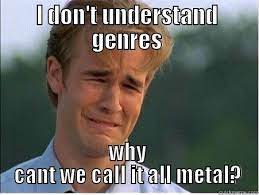

In [17]:
new_genres = pd.DataFrame({"pop":[0], "dance":[0], "metal":[0], "rock":[0], "hip_hop":[0],
                           "edm":[0], "r&b":[0], "country":[0], "emo":[0], "latin":[0], "k-pop":[0]}, index = range(len(whole_chart)))

In [18]:
for i in range(len(genres)):
    g_str = str(genres[i])
    
    if g_str.find("techno") != -1: new_genres["edm"].iloc[i] = 1
    if g_str.find("house") != -1: new_genres["edm"].iloc[i] = 1
    if g_str.find("electr") != -1: new_genres["edm"].iloc[i] = 1
    if g_str.find("hip hop") != -1: new_genres["hip_hop"].iloc[i] = 1
    if g_str.find("rap") != -1: new_genres["hip_hop"].iloc[i] = 1
    if g_str.find("soul") != -1: new_genres["r&b"].iloc[i] = 1
    if g_str.find("reggaeton") != -1: new_genres["latin"].iloc[i] = 1
    
    if g_str.find("punk") != -1: new_genres["rock"].iloc[i] = 1
    # quite controversial, but the "punk" songs in the chart are pretty poppy so will average them as rock.
    # Ex.: "All The Small Things" - Blink 182
    
    for genre in new_genres.columns:
        if g_str.find(genre) != -1: new_genres[genre].iloc[i] = 1



In [19]:
# concat the genre dict to the df
df = pd.concat([df, new_genres], axis=1)

In [20]:
#check for empty values
for col in df.columns:
    print(f"{col} {df[col].isna().sum()}")

artist 0
song 0
album 0
album_type 0
release_date 0
artist_type 0
duration_ms 0
explicit 0
track_id 0
track_number 0
danceability 0
energy 0
key 0
loudness 0
mode 0
speechiness 0
acousticness 0
instrumentalness 0
liveness 0
valence 0
tempo 0
time_signature 0
pop 0
dance 0
metal 0
rock 0
hip_hop 0
edm 0
r&b 0
country 0
emo 0
latin 0
k-pop 0


All values are in place. Now we need to make some conversions.

In [21]:
df.dtypes

artist              object
song                object
album               object
album_type          object
release_date        object
artist_type         object
duration_ms         object
explicit            object
track_id            object
track_number        object
danceability        object
energy              object
key                 object
loudness            object
mode                object
speechiness         object
acousticness        object
instrumentalness    object
liveness            object
valence             object
tempo               object
time_signature      object
pop                  int64
dance                int64
metal                int64
rock                 int64
hip_hop              int64
edm                  int64
r&b                  int64
country              int64
emo                  int64
latin                int64
k-pop                int64
dtype: object

In [22]:
# don't need the track_id anymore
df = df.drop(["track_id"], axis=1)

In [23]:
# "release_date" to date
df["release_date"] = pd.to_datetime(df["release_date"])

# add "year" column
df["year"] = df["release_date"].dt.year

In [24]:
# convert some columns to int
for col in ["track_number", "key", "mode", "time_signature"]:
    df[col] = pd.to_numeric(df[col], downcast='integer')

# convert some columns to float
for col in ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo"]:
    df[col] = pd.to_numeric(df[col], downcast='float')

df.dtypes

artist                      object
song                        object
album                       object
album_type                  object
release_date        datetime64[ns]
artist_type                 object
duration_ms                 object
explicit                    object
track_number                  int8
danceability               float32
energy                     float32
key                           int8
loudness                   float32
mode                          int8
speechiness                float32
acousticness               float32
instrumentalness           float32
liveness                   float32
valence                    float32
tempo                      float32
time_signature                int8
pop                          int64
dance                        int64
metal                        int64
rock                         int64
hip_hop                      int64
edm                          int64
r&b                          int64
country             

In [25]:
# sort all by year
df = df.sort_values(by=["release_date"])

In [26]:
df.head()

,artist,song,album,album_type,release_date,artist_type,duration_ms,explicit,track_number,danceability,...,metal,rock,hip_hop,edm,r&b,country,emo,latin,k-pop,year
317,blink-182,All The Small Things,Enema Of The State,album,1999-01-01,artist,168000,False,8,0.439,...,0,1,0,0,0,0,0,0,0,1999
1033,Wheatus,Teenage Dirtbag,Wheatus,album,1999-02-15,artist,241666,True,3,0.625,...,0,0,0,0,0,0,0,0,0,1999
1054,Splender,I Think God Can Explain,Halfway Down The Sky,album,1999-05-18,artist,236760,False,6,0.480,...,0,1,0,0,0,0,0,0,0,1999
804,Good Charlotte,Lifestyles of the Rich & Famous,Good Charlotte/The Young And The Hopeless,album,2000-01-01,artist,190173,False,3,0.620,...,0,1,0,0,0,0,0,0,0,2000
795,Good Charlotte,The Anthem,Good Charlotte/The Young And The Hopeless,album,2000-01-01,artist,175093,False,2,0.495,...,0,1,0,0,0,0,0,0,0,2000


At this point the dataset is saved and can be found in the archive with the project.

## 0. General information

In [27]:
num_artists = len(pd.unique(df['artist']))
most_common_artitsts = df["artist"].groupby(df["artist"]).count().sort_values(ascending = False).head(10)
dict_general_info = {"Tracks included": [len(df["artist"])],
                     "Number of artists included": [num_artists]
                     }
df_general_info = pd.DataFrame(dict_general_info, index=["Count"])
print(f"{df_general_info.T}\n")

                            Count
Tracks included              1069
Number of artists included    357



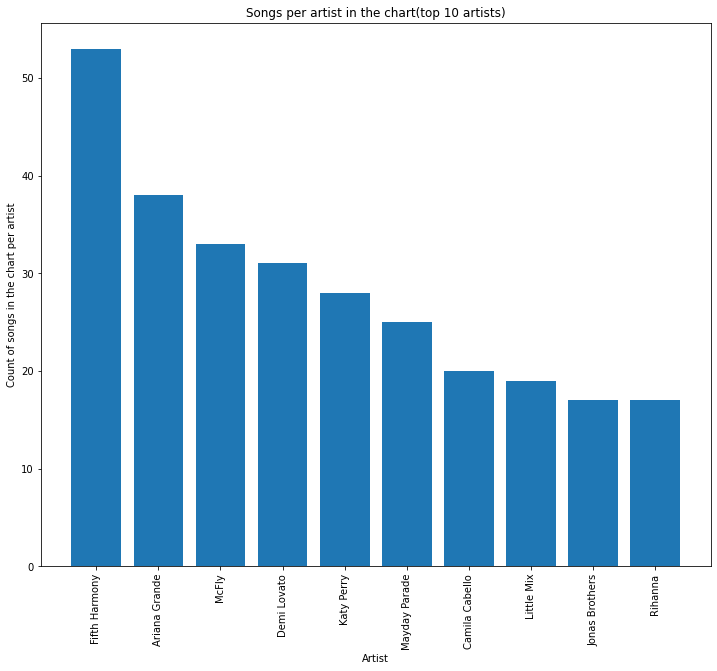

In [28]:
plt.figure(figsize = (12, 10))
plt.xlabel("Artist")
plt.ylabel("Count of songs in the chart per artist")
plt.bar(range(len(most_common_artitsts)), most_common_artitsts)
plt.xticks(range(len(most_common_artitsts)), most_common_artitsts.index, rotation = "vertical")
plt.title("Songs per artist in the chart(top 10 artists)")
plt.show()

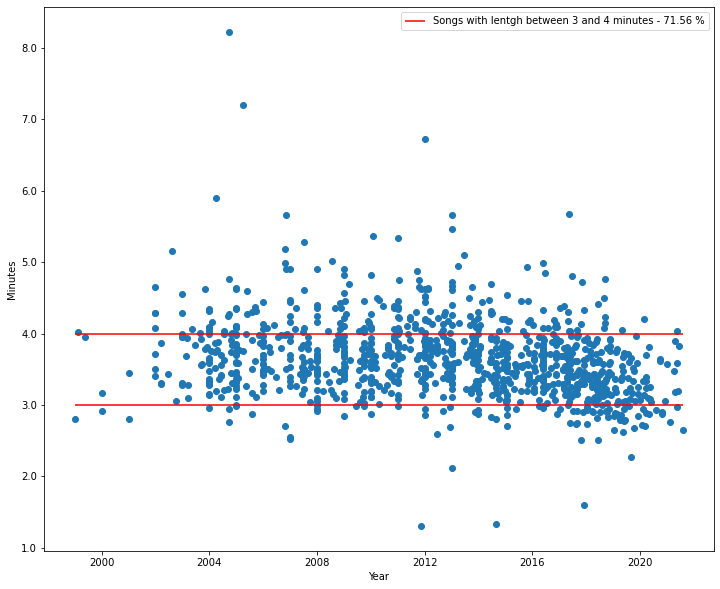

In [29]:
# Overall duration
plt.figure(figsize = (12, 10))
plt.xlabel("Year")
plt.ylabel("Minutes")
#1 minute = 60 000 milliseconds
plt.yticks(ticks = np.linspace(0, 600000, 11), labels = np.linspace(0, 10, 11))
plt.hlines([180000, 240000], df.release_date.min(), df.release_date.max(), colors='r')
percentage_of_songs_in_3_4_minutes = df.duration_ms[df.duration_ms.isin(range(180000,240000))].count()/len(df.duration_ms)*100
plt.legend([f"Songs with lentgh between 3 and 4 minutes - {percentage_of_songs_in_3_4_minutes.round(2)} %"])
plt.scatter(df.release_date, df.duration_ms)
plt.show()

In [30]:
#songs under 2.5 minutes
df[df.duration_ms.isin(range(0,150000))]

,artist,song,album,album_type,release_date,artist_type,duration_ms,explicit,track_number,danceability,...,metal,rock,hip_hop,edm,r&b,country,emo,latin,k-pop,year
675,Rihanna,Birthday Cake,Talk That Talk,album,2011-11-19,artist,78200,True,6,0.702,...,0,0,0,0,0,0,0,0,0,2011
623,Anna Kendrick,Cups (Pitch Perfect’s “When I’m Gone”) - Pop V...,Cups (Pitch Perfect’s “When I’m Gone”),single,2013-01-01,artist,126880,False,1,0.887,...,0,0,0,0,0,0,0,0,0,2013
47,Ariana Grande,Intro,My Everything (Deluxe),album,2014-08-22,artist,79840,False,1,0.447,...,0,0,0,0,0,0,0,0,0,2014
784,Fifth Harmony,Feels - Recorded at Spotify Studios NYC,Spotify Singles,single,2017-12-06,artist,95628,False,2,0.545,...,0,0,0,0,0,0,0,0,0,2017
999,OneRepublic,Wanted,Wanted,single,2019-09-06,artist,136247,False,1,0.668,...,0,1,0,0,0,0,0,0,0,2019


In [31]:
#songs over 5 minutes
df[df.duration_ms.isin(range(300000,1000000))]

,artist,song,album,album_type,release_date,artist_type,duration_ms,explicit,track_number,danceability,...,metal,rock,hip_hop,edm,r&b,country,emo,latin,k-pop,year
834,Coldplay,The Scientist,A Rush of Blood to the Head,album,2002-08-08,artist,309600,False,4,0.557,...,0,0,0,0,0,0,0,0,0,2002
241,South,Paint The Silence,Music From The O.C. Mix 1,compilation,2004-03-30,artist,353800,False,1,0.548,...,0,0,0,0,0,0,0,0,0,2004
304,Green Day,Holiday / Boulevard of Broken Dreams,American Idiot,album,2004-09-21,artist,493400,True,3,0.290,...,0,1,0,0,0,0,0,0,0,2004
243,Matt Pond PA,Champagne Supernova,Music From The O.C. Mix 4,compilation,2005-04-04,artist,432053,False,12,0.414,...,0,0,0,0,0,0,0,0,0,2005
319,My Chemical Romance,Welcome to the Black Parade,The Black Parade,album,2006-10-23,artist,311106,False,5,0.217,...,0,1,0,0,0,0,1,0,0,2006
476,Mayday Parade,Three Cheers For Five Years,Tales Told By Dead Friends,single,2006-11-07,artist,339960,False,5,0.488,...,0,1,0,0,0,0,1,0,0,2006
486,Mayday Parade,Miserable At Best,A Lesson In Romantics,album,2007-07-10,artist,316986,False,6,0.483,...,0,1,0,0,0,0,1,0,0,2007
547,Jason Reeves,The End.,The Magnificent Adventures Of Heartache [And O...,album,2008-07-31,artist,300746,False,15,0.552,...,0,0,0,0,0,0,0,0,0,2008
384,Green Day,21 Guns,21 Guns EP,single,2010-01-26,artist,322040,False,2,0.260,...,0,1,0,0,0,0,0,0,0,2010
101,Lady Gaga,The Edge Of Glory,Born This Way,album,2011-01-01,artist,320586,False,14,0.581,...,0,0,0,0,0,0,0,0,0,2011


The golden rule for a hit is its length to be in range of 3-4 minutes. About 71 % of the songs are in this range. If we increse the range to 4 and a half minutes the percentage increases to 86 %. 

In [32]:
# function to return only the part of dataframe in the year range
def filter_by_years(dataframe, features = None, min_year=1999, max_year=2021):
    if features is None:
        features = dataframe.columns
    result = dataframe[dataframe["release_date"].dt.year.isin(range(min_year, max_year))][features]
    return result

df_1999_2005 = filter_by_years(df, min_year=1999, max_year=2006)
df_2006_2010 = filter_by_years(df, min_year=2006, max_year=2011)
df_2011_2015 = filter_by_years(df, min_year=2011, max_year=2016)
df_2016_2021 = filter_by_years(df, min_year=2016, max_year=2022)

In [33]:
print(f"Count of songs relesed before 2006: {len(df_1999_2005)}")
print(f"Count of song relesed in 2006-2010 range: {len(df_2006_2010)}")
print(f"Count of song relesed in 2011-2015 range: {len(df_2011_2015)}")
print(f"Count of song relesed in 2016 and above: {len(df_2016_2021)}")

Count of songs relesed before 2006: 139
Count of song relesed in 2006-2010 range: 249
Count of song relesed in 2011-2015 range: 336
Count of song relesed in 2016 and above: 345


Count of songs breked down to ranges shows that sum of the songs in the chart between 1999-2010 is almost equal to the next 5 year periods. And the number of songs from 1999-2005 is at a half of the next 5y period and a third of the next two 5y periods. That could show that the tendecy is to have bigger divercity of likeble songs with the years.

## 1. Genres through the years

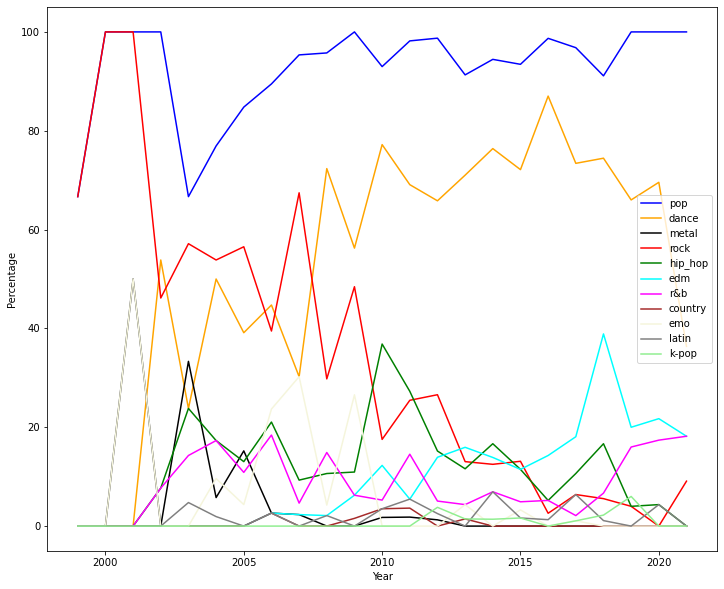

In [34]:
# Overall picture how much a genre is popular per year
genres_list = ['pop', 'dance', 'metal', 'rock', 'hip_hop', 'edm', 'r&b', 'country', 'emo', 'latin', 'k-pop']
colors = ['blue', 'orange', 'black', 'red', 'green', 'cyan', 'magenta', 'brown', 'beige', 'gray', 'lightgreen']
res = []
year_list = []

plt.figure(figsize = (12, 10))

i = -1
for genre in genres_list:
    res = []
    year_list = []
    i += 1
    for year in range(1999, 2022):
        all_songs_from_year = df[(df["year"] == year)][genre].count()
        songs_form_genre = df[(df["year"] == year) & (df[genre] == 1)][genre].count()
        res.append((songs_form_genre / all_songs_from_year) * 100)
        year_list.append(year)
    plt.plot(year_list, res, c = colors[i], label = genres_list[i])

plt.legend() 
plt.xlabel("Year")
plt.ylabel("Percentage")    
plt.show()

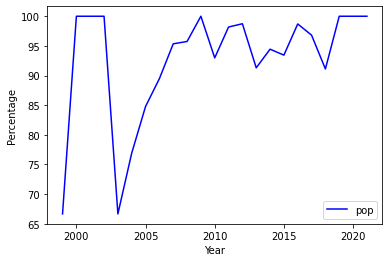

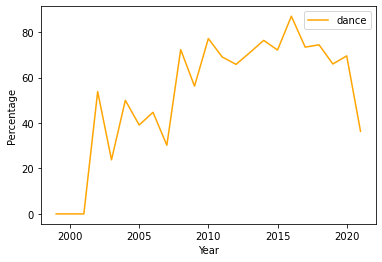

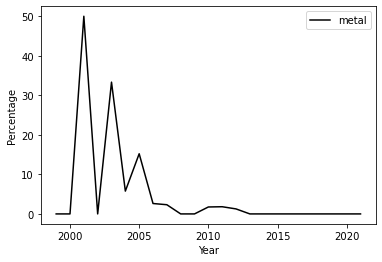

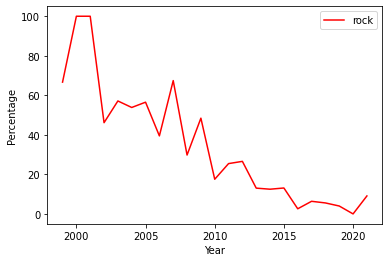

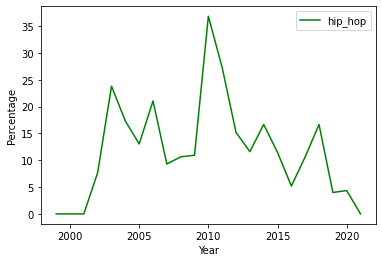

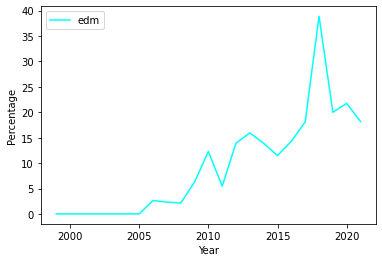

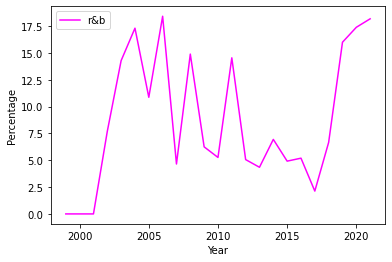

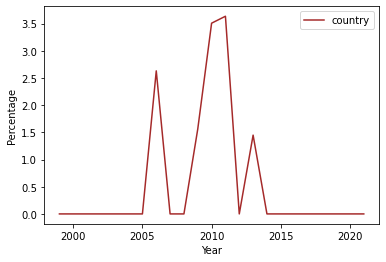

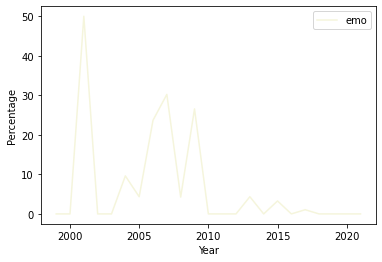

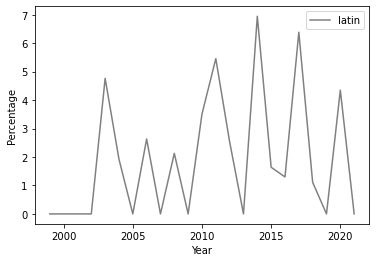

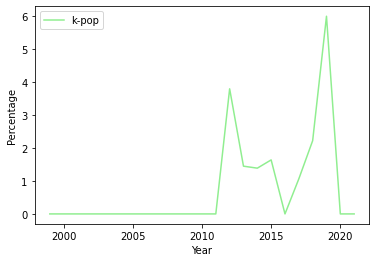

In [35]:
# Single plots per genre
genres_list = ['pop', 'dance', 'metal', 'rock', 'hip_hop', 'edm', 'r&b', 'country', 'emo', 'latin', 'k-pop']
colors = ['blue', 'orange', 'black', 'red', 'green', 'cyan', 'magenta', 'brown', 'beige', 'gray', 'lightgreen']
res = []
year_list = []

ax = plt.gca()


i = -1
for genre in genres_list:
    res = []
    year_list = []
    i += 1
    for year in range(1999, 2022):
        all_songs_from_year = df[(df["year"] == year)][genre].count()
        songs_form_genre = df[(df["year"] == year) & (df[genre] == 1)][genre].count()
        res.append((songs_form_genre / all_songs_from_year) * 100)
        year_list.append(year)
    plt.plot(year_list, res, c = colors[i], label = genres_list[i])

    plt.legend() 
    plt.xlabel("Year")
    plt.ylabel("Percentage")    
    plt.show()


Obviously Rock and Metal genres popularity is degrading, where metal is almost a flatliner after 2010.  

Here are the bands/artists who fall into metal/rock genres.

In [36]:
# bands/artists who fall in metal/rock genres
rock_metal_bands = df[(df.rock == 1) & (df.metal == 1)]["artist"]

In [37]:
[print(band) for band in rock_metal_bands.unique()]

Sum 41
3 Doors Down
Staind
Story Of The Year
Papa Roach
Creed
Hoobastank
Lifehouse
Hinder
Foo Fighters
Nickelback


[None, None, None, None, None, None, None, None, None, None, None]

$^1$ *Bands like System of a Down, Linkin Park, Disturbed - extremely popular and well-selled in the 00's(even in US) - are not 
in the chart. That is why the study should be considered as non-legitimate and made only for learning purposes*

## 2. Positive/Negative

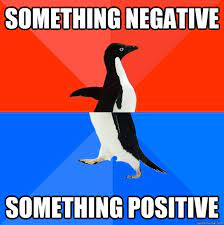

THe audio features we've extractes contains something called *valance*. By its description 
valence is:  

*A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).*  

Lets see how this is going through the years.

In [38]:
# function to plot features over time
def plt_feature_per_year(features):
    plt.figure(figsize = (12, 10))
    for feature in features:
        df_to_plot = df.groupby("year")[feature].mean()
        
        plt.plot(df_to_plot.index, df_to_plot, label = feature)
    
    plt.xlabel("Year")
    plt.ylabel("Coeficient [0-1]")
    plt.legend()
    plt.show()

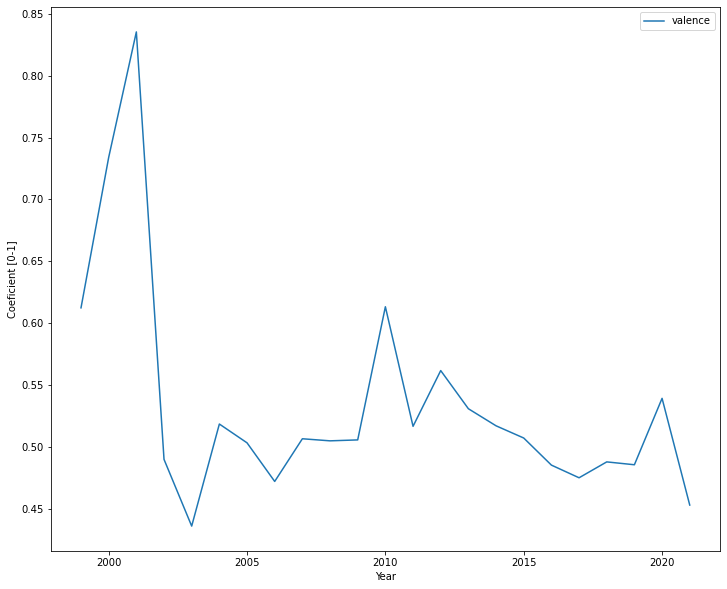

In [39]:
# "valence" or how positive is a song.
plt_feature_per_year(["valence"])

We can clearly see that the positivity after 2001/2002 abruptly drops. There are not that much records from that period in the dataset and some outliers can have big impact in the statistic, but 9/11 happened exactly at this time. If we take that into consideration we can say that this event impacts the produced music.

Lets compare that with the features.

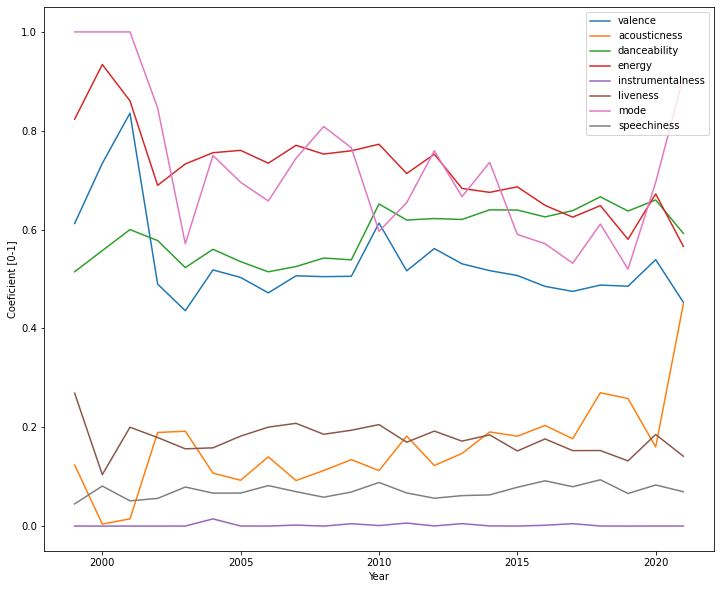

In [40]:
plt_feature_per_year(["valence", "acousticness", "danceability", "energy",
                      "instrumentalness", "liveness", "mode", "speechiness"])

Looks like the energy follows the valence.

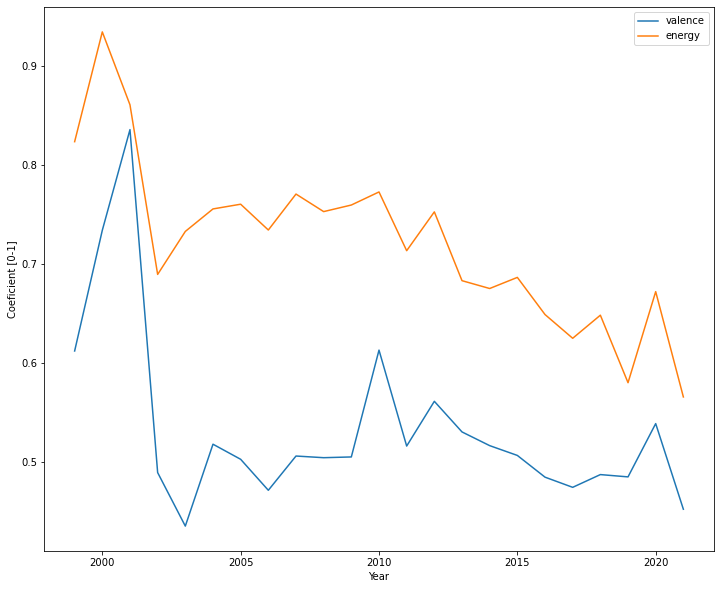

In [41]:
plt_feature_per_year(["valence", "energy"])

## 3. Interesting Facts

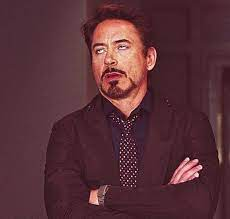

Lets see if there's a correlation between the track number in the album and the fact that it's a hit.  
For that we'll wipe out the singles and leave only the album songs.

In [42]:
album_tracks = df[df["album_type"] == "album"]

In [43]:
len(album_tracks)

695

In [44]:
track_num_counts = album_tracks["track_number"].value_counts()
track_num_counts

2     121
3     103
1      89
4      68
5      54
6      54
8      39
7      33
9      24
11     23
10     23
12     19
13     19
14     11
15     11
16      2
17      1
20      1
Name: track_number, dtype: int64

Hmmm... Some woukld say that the first track will top the chart, but apparently this is the second track followed by the third and then the first one.

Lastly we'll se if the key have impact on that if a song will became a hit or not.

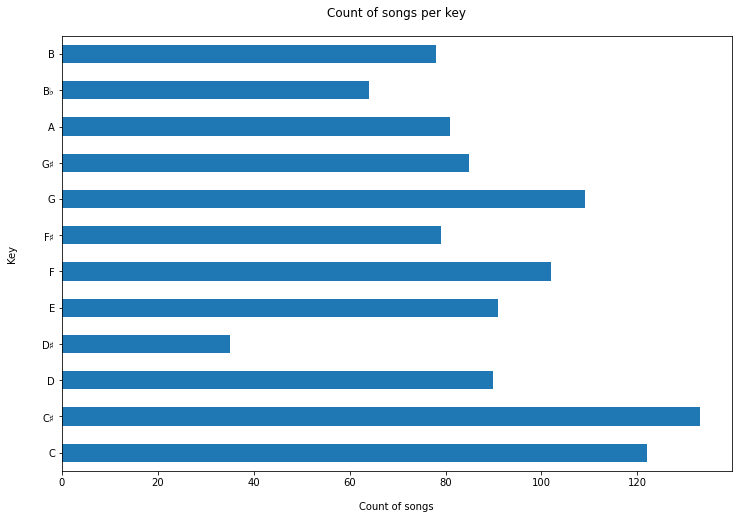

In [45]:
df_keys = df.sort_values(by = "key", ascending = True).groupby(df.key).count()
df_keys.index = ["C", r"C$\sharp$", "D", r"D$\sharp$", "E", "F", r"F$\sharp$", "G", r"G$\sharp$", "A", r"B$\flat$", "B"]


df_keys["key"].plot(kind = "barh", figsize = (12, 8))
plt.xlabel("Count of songs", labelpad=14)
plt.ylabel("Key", labelpad=24)
plt.title("Count of songs per key", y = 1.03);

C$\sharp$ it is! Closely followed by C and Pyth... G.

Well that was a short study over Billboard's hot 100 chart and as a conclusion we could say that The Rock is Dead. That doesn't mean we should stop listening to it :) What also we saw here is that if one decides to break the charts what's needed is to write songs in C$\sharp$ and put them as track number two in the album. :)

*Used resources:*
1. Similar study: https://towardsdatascience.com/billboard-hot-100-analytics-using-data-to-understand-the-shift-in-popular-music-in-the-last-60-ac3919d39b49